In [116]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [117]:
# Hàm tính chi phí tồn kho
def inventory_cost(order_qty, demand, holding_cost, shortage_cost):
    overstock = max(0, order_qty - demand)
    shortage = max(0, demand - order_qty)
    return holding_cost * overstock + shortage_cost * shortage


In [118]:
# Hàm mục tiêu cần tối ưu hóa
def objective_function(order_qty, demands, holding_cost, shortage_cost):
    return sum(inventory_cost(order_qty, demand, holding_cost, shortage_cost) for demand in demands)


In [119]:
# Thuật toán Simulated Annealing
def simulated_annealing(demands, holding_cost, shortage_cost, initial_temp, cooling_rate, max_iter):
    current_solution = random.randint(min(demands), max(demands))
    current_cost = objective_function(current_solution, demands, holding_cost, shortage_cost)
    best_solution = current_solution
    best_cost = current_cost
    temperature = initial_temp

    cost_history = [current_cost]  # Lưu lịch sử chi phí để vẽ biểu đồ

    for i in range(max_iter):
        new_solution = current_solution + random.randint(-10, 10)
        new_cost = objective_function(new_solution, demands, holding_cost, shortage_cost)

        if new_cost < current_cost or random.uniform(0, 1) < np.exp((current_cost - new_cost) / temperature):
            current_solution = new_solution
            current_cost = new_cost

            if new_cost < best_cost:
                best_solution = new_solution
                best_cost = new_cost

        temperature *= cooling_rate
        cost_history.append(current_cost)  # Lưu chi phí hiện tại vào lịch sử chi phí

    return best_solution, best_cost, cost_history

In [120]:
# Dữ liệu mẫu
demands = [random.randint(0, 150) for _ in range(30)]  # Nhu cầu sản phẩm trong 30 ngày
holding_cost = 2  # Chi phí lưu trữ mỗi đơn vị hàng tồn kho
shortage_cost = 5  # Chi phí thiếu hàng mỗi đơn vị

# Tham số thuật toán
initial_temp = 1000
cooling_rate = 0.95
max_iter = 1000

# Tối ưu hóa
best_order_qty, best_cost, cost_history = simulated_annealing(demands, holding_cost, shortage_cost, initial_temp, cooling_rate, max_iter)

print(f"Số lượng hàng đặt tối ưu: {best_order_qty}")
print(f"Chi phí tối ưu: {best_cost}")

Số lượng hàng đặt tối ưu: 115
Chi phí tối ưu: 3195


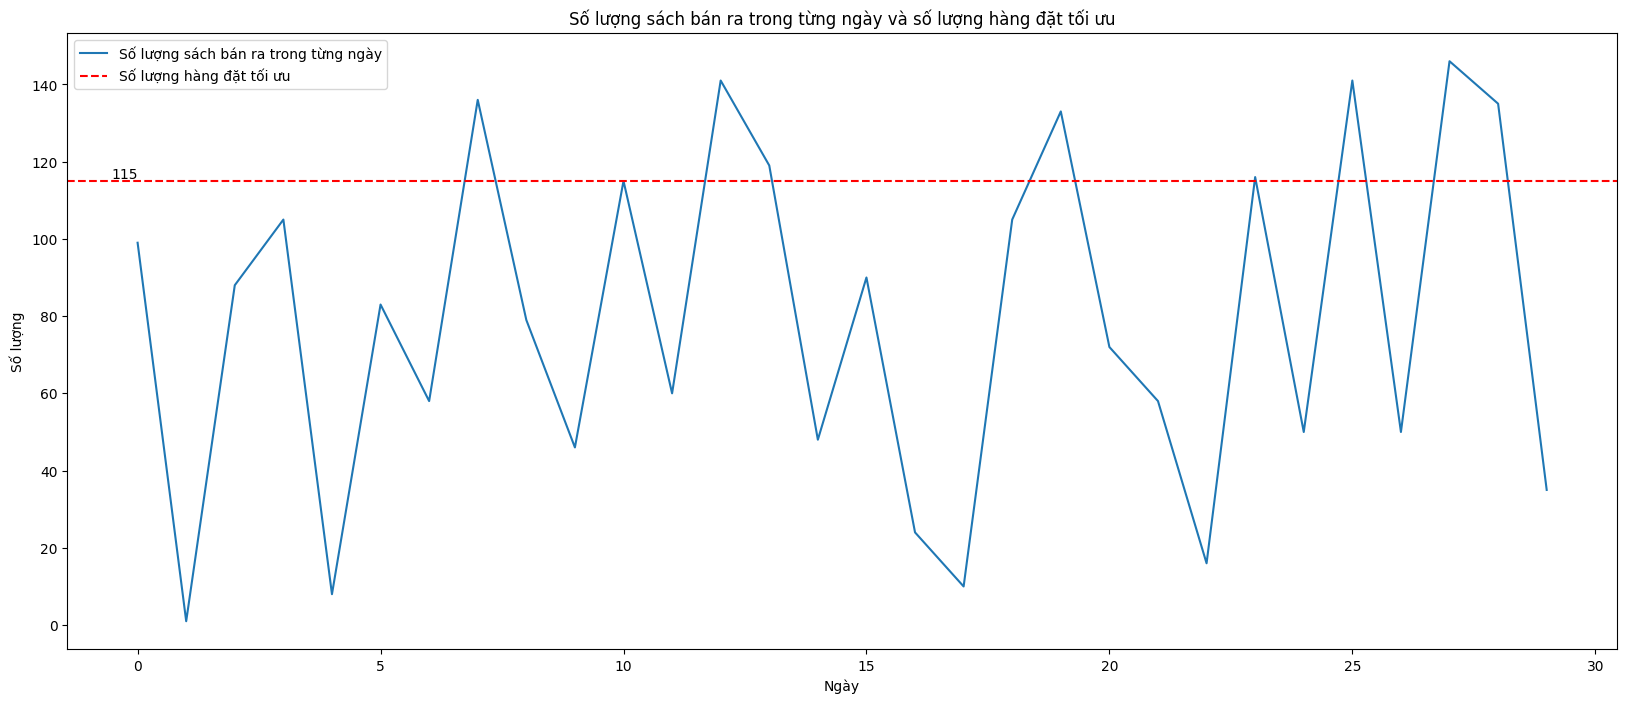

In [121]:
# Vẽ biểu đồ
plt.figure(figsize=(20, 8))

# Biểu đồ số lượng sách bán ra trong từng ngày
plt.plot(demands, label='Số lượng sách bán ra trong từng ngày')

# Vẽ đường thẳng cho số lượng hàng đặt tối ưu
plt.axhline(y=best_order_qty, color='r', linestyle='--', label='Số lượng hàng đặt tối ưu')
# Hiển thị số lượng hàng đặt tối ưu

plt.text(0, best_order_qty, f'{best_order_qty}', color='black', va='bottom', ha='right')

plt.xlabel('Ngày')
plt.ylabel('Số lượng')
plt.title('Số lượng sách bán ra trong từng ngày và số lượng hàng đặt tối ưu')
plt.legend()
plt.show()

In [122]:
print(demands)

[99, 1, 88, 105, 8, 83, 58, 136, 79, 46, 115, 60, 141, 119, 48, 90, 24, 10, 105, 133, 72, 58, 16, 116, 50, 141, 50, 146, 135, 35]
